Análisis de la encuesta sobre el uso del rtp

Resumen de KPIs:
1. Porcentaje de usuarios frecuentes: 82.00%
2. Porcentaje de usuarios en hora pico (7–9 a.m.): 46.00%
3. Tiempo promedio de espera percibido: 17.50 minutos
4. Porcentaje que percibe variabilidad: 30.00%
5. Nivel de satisfacción promedio (1 a 5): 2.68
6. Porcentaje que considera útil herramienta en tiempo real: 35.00%
7. Porcentaje que reporta obstáculos frecuentes: 31.00%
8. Porcentaje afectado por mal clima frecuentemente: 20.00%
9. Porcentaje que sufre retrasos frecuentes por tráfico: 28.00%
10. Porcentaje que llega tarde por retrasos: 0.00%
11. Porcentaje que considera mala la operación en alta demanda: 30.00%
12. Porcentaje con 3 o más problemas graves: 6.00%

Análisis exploratorio general:

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---

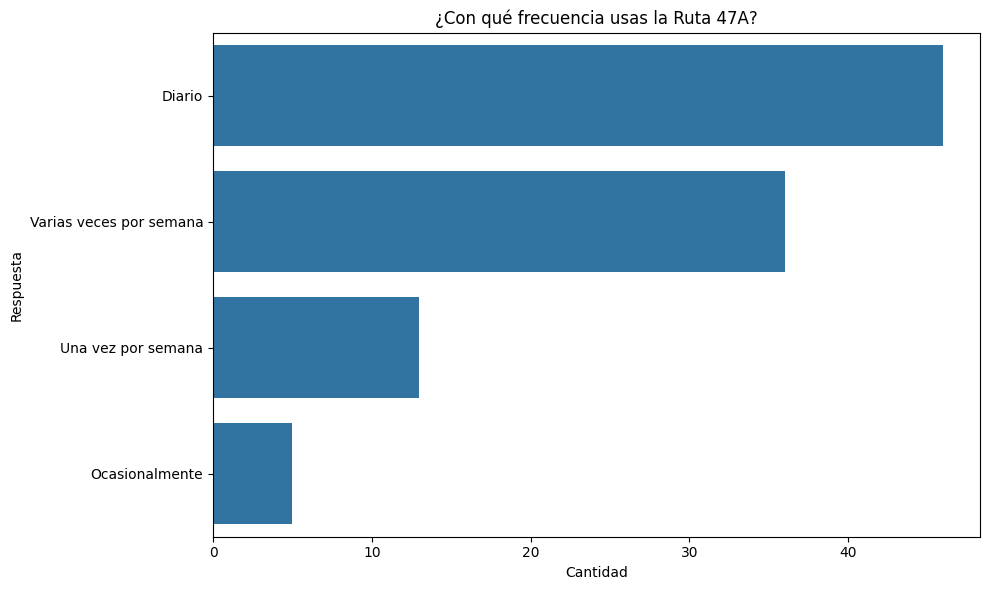

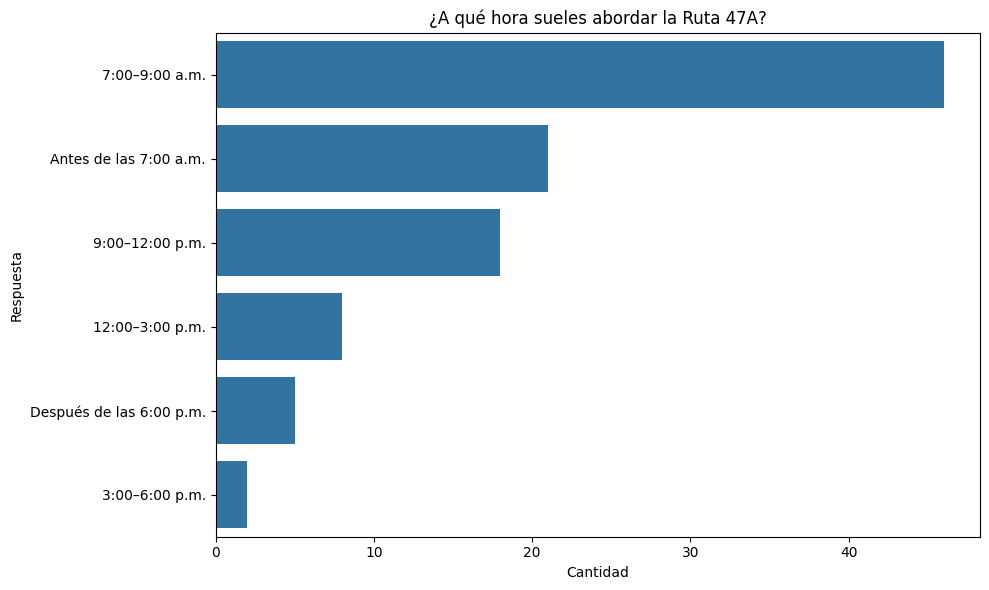

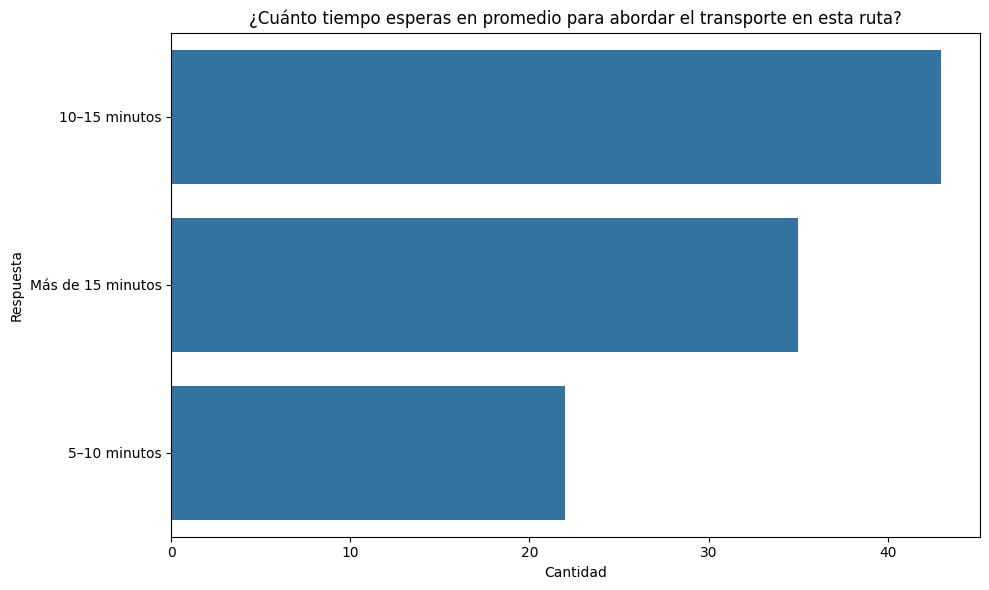

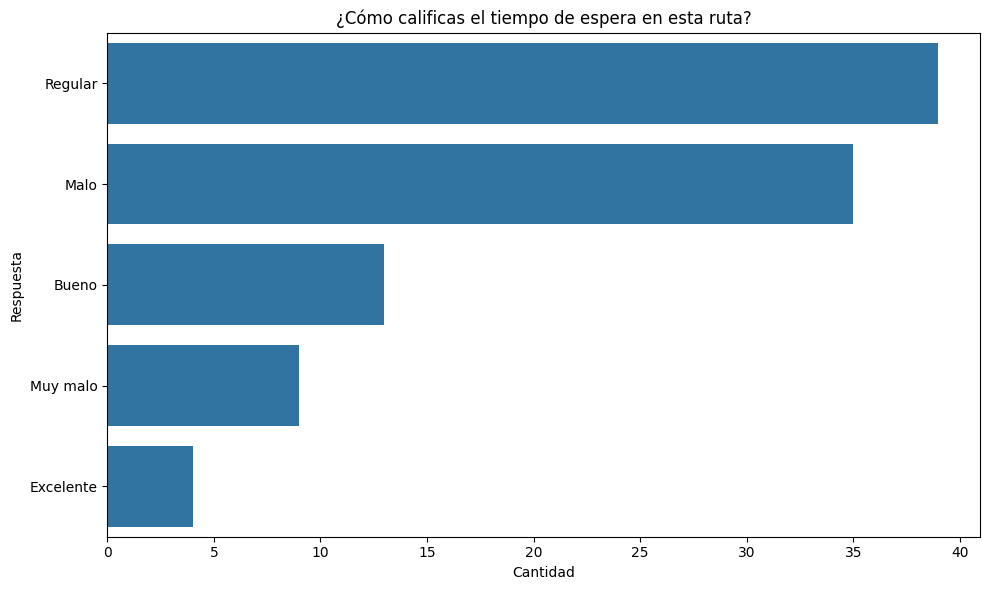

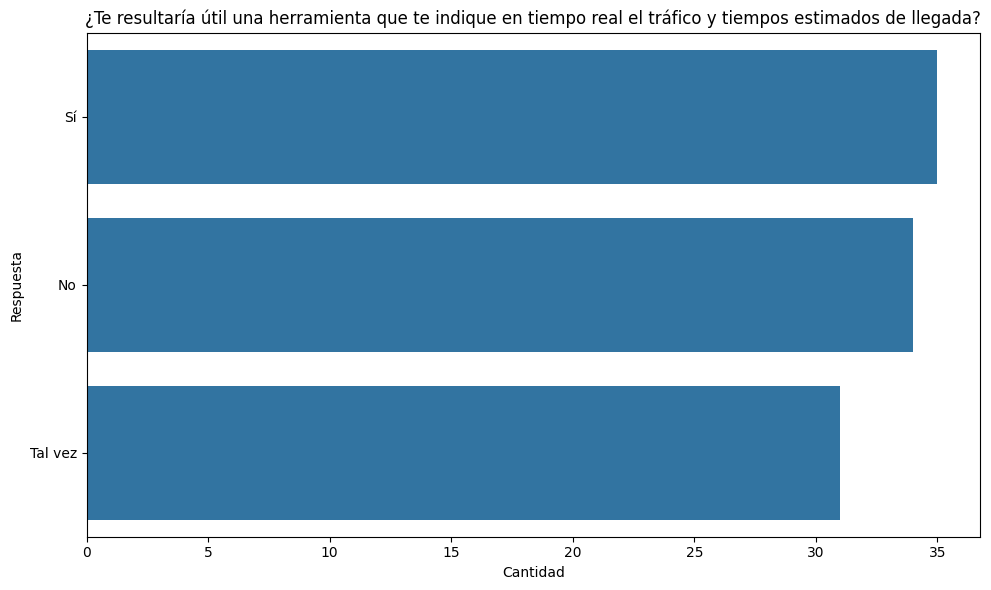

In [8]:
# Analisis de KPIs para la Ruta 47A con base en encuesta

import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV desde GitHub
url = "https://raw.githubusercontent.com/Quetzaltlali/PP_LCDN_transporte_rtp/refs/heads/main/Encuesta%20rtp.csv"
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"No se pudo acceder al archivo desde GitHub: {response.status_code}")

df = pd.read_csv(StringIO(response.text))

# -----------------------------
# KPIs BASADOS EN EL CUESTIONARIO
# -----------------------------

# Definir columnas clave
total = df.shape[0]

# KPI 1: % usuarios frecuentes
kpi_frecuencia = df['¿Con qué frecuencia usas la Ruta 47A?'].isin(['Diario', 'Varias veces por semana']).mean() * 100

# KPI 2: % usuarios en hora pico (7–9 a.m.)
kpi_hora_pico = (df['¿A qué hora sueles abordar la Ruta 47A?'] == '7:00–9:00 a.m.').mean() * 100

# KPI 3: Tiempo promedio de espera percibido
espera_map = {
    'Menos de 5 minutos': 3,
    'Entre 5 y 10 minutos': 7.5,
    'Entre 10 y 15 minutos': 12.5,
    'Más de 15 minutos': 17.5
}
df['espera_min'] = df['¿Cuánto tiempo esperas en promedio para abordar el transporte en esta ruta?'].map(espera_map)
kpi_tiempo_espera = df['espera_min'].mean()

# KPI 4: % que perciben variabilidad del tiempo de espera
kpi_variabilidad = (df['¿Sientes que el tiempo de espera varía según el horario?'].str.strip() == 'Sí').mean() * 100

# KPI 5: Nivel de satisfacción promedio
satisfaccion_map = {
    'Excelente': 5,
    'Bueno': 4,
    'Regular': 3,
    'Malo': 2,
    'Muy malo': 1
}
df['satisfaccion_score'] = df['¿Cómo calificas el tiempo de espera en esta ruta?'].map(satisfaccion_map)
kpi_satisfaccion = df['satisfaccion_score'].mean()

# KPI 6: % que ve útil una herramienta en tiempo real
kpi_herramienta = (df['¿Te resultaría útil una herramienta que te indique en tiempo real el tráfico y tiempos estimados de llegada?'].str.strip() == 'Sí').mean() * 100

# -----------------------------
# KPIs ADICIONALES: SOLUCIÓN DE PROBLEMAS
# -----------------------------

# KPI 7: % que reporta obstáculos frecuentes
kpi_obstaculos = (df['¿Con qué frecuencia encuentra obstáculos (autos mal estacionados, basura, obras) que dificulten el paso del RTP?'] == 'Siempre').mean() * 100

# KPI 8: % afectados por mal clima
kpi_clima = (df['¿Con qué frecuencia el mal clima (lluvia, viento, calor extremo) afecta su experiencia en la espera o uso del RTP?'] == 'Siempre').mean() * 100

# KPI 9: % que reporta retrasos frecuentes por tráfico
kpi_trafico = (df['¿Con qué frecuencia el tráfico vehicular retrasa significativamente su trayecto en RTP?'] == 'Siempre').mean() * 100

# KPI 10: % de usuarios que llega tarde por retrasos
kpi_llegatarde = (df['¿Suele llegar tarde a su destino por retrasos en el RTP?'] == 'Siempre').mean() * 100

# KPI 11: % que considera mala la operación en alta demanda
kpi_mala_operacion = (df['¿Considera que el RTP ajusta bien su operación en temporadas de alta demanda (como vacaciones, festivales, marchas)?'] == 'No').mean() * 100

# KPI 12: Índice de usuarios con múltiples problemas
df['indice_problema'] = 0
problemas = [
    ('¿Con qué frecuencia encuentra obstáculos (autos mal estacionados, basura, obras) que dificulten el paso del RTP?', 'Siempre'),
    ('¿Con qué frecuencia el mal clima (lluvia, viento, calor extremo) afecta su experiencia en la espera o uso del RTP?', 'Siempre'),
    ('¿Con qué frecuencia el tráfico vehicular retrasa significativamente su trayecto en RTP?', 'Siempre'),
    ('¿Suele llegar tarde a su destino por retrasos en el RTP?', 'Siempre'),
    ('¿Considera que el RTP ajusta bien su operación en temporadas de alta demanda (como vacaciones, festivales, marchas)?', 'No'),
    ('¿Cómo calificas el tiempo de espera en esta ruta?', 'Muy malo')
]
for col, val in problemas:
    df['indice_problema'] += (df[col] == val).astype(int)

kpi_usuarios_criticos = (df['indice_problema'] >= 3).mean() * 100

# Mostrar KPIs
print("Resumen de KPIs:")
print(f"1. Porcentaje de usuarios frecuentes: {kpi_frecuencia:.2f}%")
print(f"2. Porcentaje de usuarios en hora pico (7–9 a.m.): {kpi_hora_pico:.2f}%")
print(f"3. Tiempo promedio de espera percibido: {kpi_tiempo_espera:.2f} minutos")
print(f"4. Porcentaje que percibe variabilidad: {kpi_variabilidad:.2f}%")
print(f"5. Nivel de satisfacción promedio (1 a 5): {kpi_satisfaccion:.2f}")
print(f"6. Porcentaje que considera útil herramienta en tiempo real: {kpi_herramienta:.2f}%")
print(f"7. Porcentaje que reporta obstáculos frecuentes: {kpi_obstaculos:.2f}%")
print(f"8. Porcentaje afectado por mal clima frecuentemente: {kpi_clima:.2f}%")
print(f"9. Porcentaje que sufre retrasos frecuentes por tráfico: {kpi_trafico:.2f}%")
print(f"10. Porcentaje que llega tarde por retrasos: {kpi_llegatarde:.2f}%")
print(f"11. Porcentaje que considera mala la operación en alta demanda: {kpi_mala_operacion:.2f}%")
print(f"12. Porcentaje con 3 o más problemas graves: {kpi_usuarios_criticos:.2f}%")

# -----------------------------
# ANALISIS EXPLORATORIO GENERAL
# -----------------------------
print("\nAnálisis exploratorio general:")
print("\nResumen del DataFrame:")
print(df.info())

print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Distribuciones para todas las columnas categóricas
for col in df.select_dtypes(include='object').columns:
    print(f"\nDistribución de respuestas para: {col}")
    print(df[col].value_counts())

# Graficar principales variables categóricas
cols_graficar = [
    '¿Con qué frecuencia usas la Ruta 47A?',
    '¿A qué hora sueles abordar la Ruta 47A?',
    '¿Cuánto tiempo esperas en promedio para abordar el transporte en esta ruta?',
    '¿Cómo calificas el tiempo de espera en esta ruta?',
    '¿Te resultaría útil una herramienta que te indique en tiempo real el tráfico y tiempos estimados de llegada?'
]

for col in cols_graficar:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(col)
    plt.xlabel("Cantidad")
    plt.ylabel("Respuesta")
    plt.tight_layout()
    plt.show()
